# Kaggle Competition on NLP

## Data preprocessing

### Gather the data

In [4]:
import os 

os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [5]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 61.7MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 64.1MB/s]
  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 22.8MB/s]


In [6]:
import pandas as pd

train_dataset = pd.read_csv('train.csv')

In [7]:
train_dataset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Data preprocessing

In [8]:
train_dataset.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [9]:
train_dataset['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [10]:
len(train_dataset)

7613

In [11]:
train_dataset = train_dataset.drop(['id','location'], axis=1)

In [12]:
train_dataset.head()

,keyword,text,target
0,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
train_dataset = train_dataset.dropna()

In [14]:
train_dataset.head()

,keyword,text,target
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,ablaze,Crying out for more! Set me ablaze,0
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [15]:
len(train_dataset)

7552

In [16]:
# check for any empty text in dataset
(train_dataset.text.str.len() == 0).any()

False

In [17]:
train_dataset.isnull().sum()

keyword    0
text       0
target     0
dtype: int64

In [18]:
train_dataset['target'].value_counts()

0    4323
1    3229
Name: target, dtype: int64

In [19]:
test_set = train_dataset

In [20]:
test_set.head()

,keyword,text,target
31,ablaze,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,ablaze,We always try to bring the heavy. #metal #RT h...,0
33,ablaze,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,ablaze,Crying out for more! Set me ablaze,0
35,ablaze,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


### Test data preprocessing

In [21]:
test_csv = pd.read_csv('test.csv')
test_csv.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [22]:
test_csv_text = test_csv['text']

In [23]:
test_csv_text.head()

0                   Just happened a terrible car crash
1    Heard about #earthquake is different cities, s...
2    there is a forest fire at spot pond, geese are...
3             Apocalypse lighting. #Spokane #wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

### split the dataset

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(test_set['text'].to_numpy(),
                                                    test_set['target'].to_numpy(),
                                                    test_size=0.1,
                                                    random_state=42)
# 
                                                    # 

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(6796, 756, 6796, 756)

## Train the model

### Naive Bayes (got 79.25)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model_pipeline = Pipeline([
                           ('tfidf', TfidfVectorizer()),
                           ('cls', MultinomialNB())
                           ])
model_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('cls',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
pred_y = model_pipeline.predict(X_test)
pred_y.shape, y_test.shape

((756,), (756,))

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred_y)

0.8042328042328042

#### prediction on test_csv

In [29]:
pred_text_csv = model_pipeline.predict(test_csv_text)

In [30]:
pred_text_csv.shape

(3263,)

In [31]:
submission = pd.DataFrame({
        "id": test_csv['id'],
        "target": pred_text_csv
    })

In [32]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,1
3,9,1
4,11,1


In [33]:
submission.to_csv('sub1.csv',index=False)

## NN

* Get the data

* Convert text into number (tokenization and embadding)

* Bulild and train the the model

In [34]:
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

### TextVectorization and Embedding

In [35]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in X_train])/len(X_train))

15

In [36]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)


text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # how many words in the vocabulary
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=max_length) # how long should the output sequence of tokens be?

In [37]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train)

In [38]:
# example
sample_sentence = "I want to do my master degree in Canada specialization on deep learning"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8,  139,    5,   68,   13,    1, 2512,    4, 1421,    1,   11,
        1136, 1824,    0,    0]])>

In [39]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['paine', 'pageshi', 'pages', 'pageparkescorp', 'pagasa']


In [40]:
embedding = layers.Embedding(input_dim=max_vocab_length,# set input shape
                             output_dim=64,# set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length) # how long is each input

In [41]:
sample_sentence = "I want to do my master degree in Canada specialization on deep learning"
embedding(text_vectorizer([sample_sentence]))

<tf.Tensor: shape=(1, 15, 64), dtype=float32, numpy=
array([[[-1.68423653e-02, -3.51290330e-02,  3.78157757e-02,
         -3.74754556e-02, -4.96435761e-02, -1.44017451e-02,
          4.19824459e-02,  4.64372747e-02, -1.79428943e-02,
         -3.87945883e-02,  4.06533815e-02, -1.53540596e-02,
          3.32317017e-02,  4.95226420e-02,  2.62668468e-02,
          3.93355004e-02, -1.53685436e-02,  4.31172289e-02,
         -4.11343798e-02, -3.00583001e-02, -4.32653688e-02,
         -2.70847231e-03, -7.04623759e-04,  1.61798708e-02,
          1.84569508e-03, -9.95019823e-03,  1.84730440e-03,
         -6.23136759e-03, -3.15705091e-02,  6.14523888e-05,
         -4.94173765e-02,  4.79557849e-02,  3.69166210e-03,
         -2.83751134e-02,  4.60398458e-02,  4.56408747e-02,
         -2.57733706e-02, -3.47549804e-02, -2.64267456e-02,
         -8.67755339e-03, -1.43895522e-02,  3.02635320e-02,
         -3.10046207e-02,  3.90521325e-02,  2.81790644e-03,
         -6.67814165e-03, -3.48069184e-02,  1.2

### model1 (simple neural network)

In [42]:
inputs = layers.Input(shape=(1,), dtype='string')

X = text_vectorizer(inputs)
X = embedding(X)

X = layers.GlobalAveragePooling1D()(X) # we need the shape of output (None, 1)=> one value per sequence not in (None, 15, 1)=> one value per token
outputs = layers.Dense(1, activation='sigmoid')(X)

model1 = tf.keras.Model(inputs, outputs)

model1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [43]:
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 64)            640000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 640,065
Trainable params: 640,065
Non-trainable params: 0
_________________________________________________________________


In [44]:
history1 = model1.fit(X_train,
           y_train,
           epochs=5,
           validation_data=(X_test,y_test))

Epoch 1/5
213/213 [==============================] - 5s 9ms/step - loss: 0.6361 - accuracy: 0.6713 - val_loss: 0.5635 - val_accuracy: 0.7474
Epoch 2/5
213/213 [==============================] - 2s 8ms/step - loss: 0.4926 - accuracy: 0.8006 - val_loss: 0.4683 - val_accuracy: 0.7817
Epoch 3/5
213/213 [==============================] - 2s 8ms/step - loss: 0.3985 - accuracy: 0.8417 - val_loss: 0.4340 - val_accuracy: 0.7950
Epoch 4/5
213/213 [==============================] - 2s 8ms/step - loss: 0.3361 - accuracy: 0.8680 - val_loss: 0.4211 - val_accuracy: 0.8069
Epoch 5/5
213/213 [==============================] - 2s 8ms/step - loss: 0.2890 - accuracy: 0.8901 - val_loss: 0.4234 - val_accuracy: 0.8042


In [45]:
model1.evaluate(X_test,y_test)

24/24 [==============================] - 0s 3ms/step - loss: 0.4234 - accuracy: 0.8042


[0.4234403669834137, 0.8042327761650085]

In [46]:
pred_text_csv2 = model1.predict(test_csv_text)

In [47]:
pred_text_csv2 = tf.cast(tf.squeeze(tf.round(pred_text_csv2)), dtype=tf.int32)

In [48]:
submission = pd.DataFrame({
        "id": test_csv['id'],
        "target": pred_text_csv2
    })

In [49]:
submission.to_csv('sub2.csv',index=False)

### model2 (LSTM,GRU and bidirectional

In [50]:
inputs = layers.Input(shape=(1,), dtype='string')

X = text_vectorizer(inputs)
X = embedding(X)

X = layers.LSTM(64)(X)
# X = layers.GRU(64)(X)
# X = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(X)
# X = layers.Bidirectional(layers.GRU(64))(X)

outputs = layers.Dense(1, activation='sigmoid')(X)

model2 = tf.keras.Model(inputs, outputs)

model2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [51]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 64)            640000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [52]:
history2 = model2.fit(X_train,
                      y_train,
                      epochs=5,
                      validation_data=(X_test,y_test))

Epoch 1/5
213/213 [==============================] - 8s 13ms/step - loss: 0.2595 - accuracy: 0.8992 - val_loss: 0.5285 - val_accuracy: 0.7963
Epoch 2/5
213/213 [==============================] - 2s 11ms/step - loss: 0.1901 - accuracy: 0.9305 - val_loss: 0.5918 - val_accuracy: 0.7937
Epoch 3/5
213/213 [==============================] - 2s 11ms/step - loss: 0.1552 - accuracy: 0.9420 - val_loss: 0.6110 - val_accuracy: 0.7817
Epoch 4/5
213/213 [==============================] - 2s 11ms/step - loss: 0.1280 - accuracy: 0.9535 - val_loss: 0.5795 - val_accuracy: 0.7857
Epoch 5/5
213/213 [==============================] - 2s 11ms/step - loss: 0.1051 - accuracy: 0.9597 - val_loss: 0.8459 - val_accuracy: 0.7659


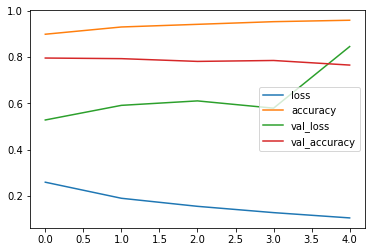

In [53]:
pd.DataFrame(history2.history).plot()

In [54]:
model2.evaluate(X_test,y_test)

24/24 [==============================] - 0s 4ms/step - loss: 0.8459 - accuracy: 0.7659


[0.8458914160728455, 0.7658730149269104]

### model3 (Conv1d)

In [70]:
inputs = layers.Input(shape=(1,), dtype='string')
X = text_vectorizer(inputs)
X = embedding(X)

X = layers.Conv1D(32, kernel_size=5, activation='relu')(X)
X = layers.GlobalMaxPool1D()(X)
outputs = layers.Dense(1, activation='sigmoid')(X)

model3 = tf.keras.Model(inputs, outputs)

model3.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [71]:
model3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 64)            640000    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 11, 32)            10272     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 650,305
Trainable params: 650,305
Non-trainable params: 0
_____________________________________________________

In [72]:
model3.fit(X_train,
           y_train,
           epochs=5,
           validation_data=(X_test,y_test))

Epoch 1/5
213/213 [==============================] - 3s 11ms/step - loss: 0.1252 - accuracy: 0.9634 - val_loss: 0.8143 - val_accuracy: 0.7632
Epoch 2/5
213/213 [==============================] - 2s 10ms/step - loss: 0.0574 - accuracy: 0.9798 - val_loss: 0.9400 - val_accuracy: 0.7672
Epoch 3/5
213/213 [==============================] - 2s 10ms/step - loss: 0.0500 - accuracy: 0.9806 - val_loss: 1.0353 - val_accuracy: 0.7646
Epoch 4/5
213/213 [==============================] - 2s 10ms/step - loss: 0.0482 - accuracy: 0.9779 - val_loss: 1.0896 - val_accuracy: 0.7593
Epoch 5/5
213/213 [==============================] - 2s 10ms/step - loss: 0.0458 - accuracy: 0.9797 - val_loss: 1.1364 - val_accuracy: 0.7606


In [73]:
model3.evaluate(X_test,y_test)

24/24 [==============================] - 0s 3ms/step - loss: 1.1364 - accuracy: 0.7606


[1.136422038078308, 0.7605820298194885]

### model4 (transform learning)

In [74]:
import tensorflow_hub as hub

In [92]:
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        trainable=False,
                                        dtype=tf.string)

model4 = tf.keras.Sequential([
      sentence_encoder_layer,
      layers.Dense(64, activation='relu'),
      layers.Dense(1, activation='sigmoid')
])

model4.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [93]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 512)               256797824 
_________________________________________________________________
dense_16 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [94]:
model4.fit(X_train,
           y_train,
           epochs=5,
           validation_data=(X_test,y_test))

Epoch 1/5
213/213 [==============================] - 5s 12ms/step - loss: 0.5079 - accuracy: 0.7791 - val_loss: 0.4354 - val_accuracy: 0.8056
Epoch 2/5
213/213 [==============================] - 2s 11ms/step - loss: 0.4197 - accuracy: 0.8128 - val_loss: 0.4246 - val_accuracy: 0.8095
Epoch 3/5
213/213 [==============================] - 2s 11ms/step - loss: 0.4050 - accuracy: 0.8208 - val_loss: 0.4228 - val_accuracy: 0.8228
Epoch 4/5
213/213 [==============================] - 2s 11ms/step - loss: 0.3960 - accuracy: 0.8258 - val_loss: 0.4250 - val_accuracy: 0.8135
Epoch 5/5
213/213 [==============================] - 2s 11ms/step - loss: 0.3885 - accuracy: 0.8275 - val_loss: 0.4273 - val_accuracy: 0.8135


In [95]:
model4.evaluate(X_test,y_test)

24/24 [==============================] - 0s 9ms/step - loss: 0.4273 - accuracy: 0.8135


[0.4273218512535095, 0.8134920597076416]

In [108]:
pred_y =tf.squeeze(tf.round(model4.predict(test_csv_text)))

In [112]:
pred_y = tf.cast(pred_y, dtype=tf.int32)

In [113]:
sub = pd.DataFrame({
              'id':test_csv['id'],
              'target':pred_y
            })

In [114]:
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [115]:
sub.to_csv('sub3.csv',index=False)